<a href="https://colab.research.google.com/github/sreeja-g/sampling_mc/blob/master/Importance_sampling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importance Sampling

####Using importance sampling here provides a **reduction in the variance** of an integral approximation.

In [0]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
x = np.linspace(0, 10, 100000) 

In [0]:
def f(x):
    return np.exp(-2*np.abs(x-5))

In [0]:
def p(x):
    return st.uniform(0,10).pdf(x)

def q(x):
    return st.norm(5,1).pdf(x)

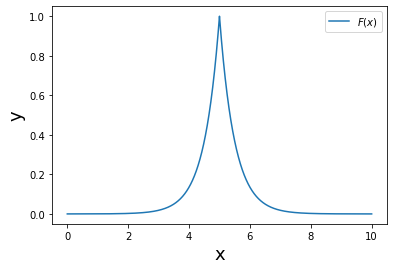

In [97]:
plt.plot(x, f(x), label="$F(x)$")

plt.xlabel("x", size=18)
plt.ylabel("y", size=18)
plt.legend(loc='best')
plt.show()

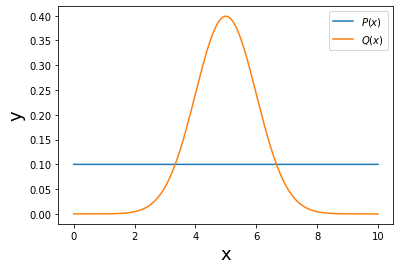

In [98]:
plt.plot(x, p(x), label="$P(x)$")
plt.plot(x, q(x), label="$Q(x)$")

plt.xlabel("x", size=18)
plt.ylabel("y", size=18)
plt.legend(loc='best')
plt.show()

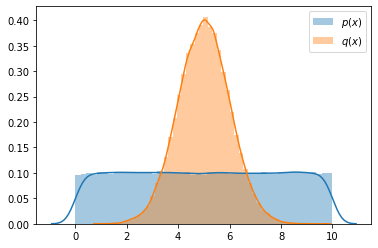

In [99]:
sns.distplot([np.random.uniform(0,10) for _ in range(100000)], label="$p(x)$")
sns.distplot([np.random.normal(5, 1) for _ in range(100000)], label="$q(x)$")

plt.legend()

average 0.9904177128045021 variance 3.952061139642997


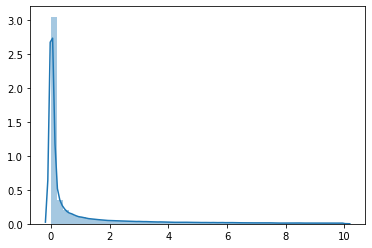

In [100]:
def sampling_p_x(iter=1000):
    
    samples_p_x = []

    for i in range(iter):
        z = np.random.uniform(0,10)
        
        samples_p_x.append(10*f(z))

    sns.distplot(samples_p_x)
    return np.array(samples_p_x)

p_x_sampling = sampling_p_x(iter=100000)
print("average {} variance {}".format(np.mean(p_x_sampling), np.var(p_x_sampling)))

In [0]:
def importance_sampling(iter=1000):
    
    samples = []

    for i in range(iter):
        z = np.random.normal(5, 1)
        
        samples.append(10*f(z)*(p(z)/q(z)))

    return np.array(samples)

In [0]:
imp_sampling = importance_sampling(iter=100000)

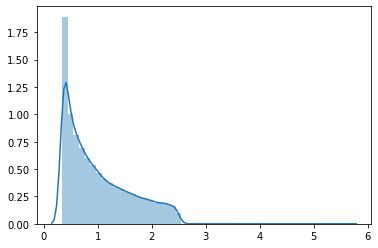

In [103]:
sns.distplot(imp_sampling)

In [104]:
print("average {} variance {}".format(np.mean(imp_sampling), np.var(imp_sampling)))

average 1.000189143195374 variance 0.35575626260939636


In [105]:
np.trapz(f(x),x=x)

0.9999545984033862

In [107]:
np.abs(np.trapz(f(x),x=x)-np.mean(p_x_sampling))

0.009536885598884104

In [108]:
np.abs(np.trapz(f(x),x=x)-np.mean(imp_sampling))

0.00023454479198781186